# Statistical Analysis and Unsupervised Hierarchical Clustering for the Cancer Registry

## Objectives:
- To identify patterns, associations, and potential risk factors among cancer cases using statistical analysis.
- To apply unsupervised Hierarchical Clustering techniques to group cancer cases into distinct clusters based on shared characteristics, providing insights into co-occurring factors and patient profiles.


# Data Exploration and Preparation

In [ ]:
import pandas as pd
df = pd.read_excel('/content/cancer cases excel sheet (1).xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date of data entry,Organisation unit name,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Alternative Staging,Stage,date of death,Patient status,smokin history,alcohol hx,family planning,chemo cycles,radiotherapy session,surgery
0,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date of data entry      2785 non-null   object 
 1   Organisation unit name  2785 non-null   object 
 2   Age in Years            2767 non-null   object 
 3   Sex                     2765 non-null   object 
 4   Primary site            2769 non-null   object 
 5   Histology Type          2769 non-null   object 
 6   Date of reporting       2758 non-null   object 
 7   Alternative Staging     898 non-null    object 
 8   Stage                   1822 non-null   object 
 9   date of death           3 non-null      object 
 10  Patient status          2766 non-null   object 
 11  smokin history          5 non-null      object 
 12  alcohol hx              5 non-null      object 
 13  family planning         2 non-null      object 
 14  chemo cycles            1 non-null      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2785, 17)

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date of data entry', 'Organisation unit name', 'Age in Years', 'Sex',
       'Primary site', 'Histology Type', 'Date of reporting',
       'Alternative Staging', 'Stage', 'date of death', 'Patient status',
       'smokin history', 'alcohol hx', 'family planning', 'chemo cycles',
       'radiotherapy session', 'surgery'],
      dtype='object')

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date of data entry,Organisation unit name,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Alternative Staging,Stage,date of death,Patient status,smokin history,alcohol hx,family planning,chemo cycles,radiotherapy session,surgery
0,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,NaN,Stage IV,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,chemo cycles,radiotherapy session,surgery
count,1.0,0.0,0.0
mean,2.0,NaN,NaN
std,NaN,NaN,NaN
min,2.0,NaN,NaN
25%,2.0,NaN,NaN
50%,2.0,NaN,NaN
75%,2.0,NaN,NaN
max,2.0,NaN,NaN


# Data Preprosessing

In [ ]:
#Checking for null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date of data entry,0
Organisation unit name,0
Age in Years,18
Sex,20
Primary site,16
Histology Type,16
Date of reporting,27
Alternative Staging,1887
Stage,963
date of death,2782


In [ ]:
# Dropping null columns
df.drop(['surgery','radiotherapy session','chemo cycles','family planning','alcohol hx','date of death','smokin history'], axis=1, inplace=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date of data entry', 'Organisation unit name', 'Age in Years', 'Sex',
       'Primary site', 'Histology Type', 'Date of reporting',
       'Alternative Staging', 'Stage', 'Patient status'],
      dtype='object')

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Organisation unit name,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Alternative Staging,Stage,Patient status
0,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,NaN,Stage IV,Dead
2,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,NaN,Stage IV,Dead
4,2021-08-06 00:00:00.0,Nyeri Provincial General Hospital (PGH),50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,NaN,Stage IV,Dead


# Feature Selection

- We are reducing the input variable and getting rid of noise in data.

In [ ]:
df.drop(['Organisation unit name'],axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Alternative Staging,Stage,Patient status
0,2021-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-06 00:00:00.0,50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,NaN,Stage IV,Dead
2,2021-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-06 00:00:00.0,50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,NaN,Stage IV,Dead
4,2021-08-06 00:00:00.0,50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,NaN,Stage IV,Dead


In [ ]:
#Checking for null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date of data entry,0
Age in Years,18
Sex,20
Primary site,16
Histology Type,16
Date of reporting,27
Alternative Staging,1887
Stage,963
Patient status,19


- Merging Alternative Staging data into Stage where Stag

In [ ]:
# Merge Alternative Staging data into Stage where Stage is missing (NaN)
df['Stage'] = df['Stage'].fillna(df['Alternative Staging'])
# Drop the Alternative Staging column if no longer needed
df.drop(columns=['Alternative Staging'], inplace=True)
df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status
0,2021-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-06 00:00:00.0,50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,Stage IV,Dead
2,2021-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-06 00:00:00.0,50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,Stage IV,Dead
4,2021-08-06 00:00:00.0,50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,Stage IV,Dead
5,2021-08-09 00:00:00.0,70 +,Male,Liver,"Hepatocellular carcinoma, NOS",2020-12-02 00:00:00.0,Stage IV,Alive
6,2021-08-09 00:00:00.0,60 - 69 years,Female,Stomach NOS,"Adenocarcinoma, intestinal type",2021-04-07 00:00:00.0,Stage I,Alive
7,2021-08-09 00:00:00.0,40 - 49 years,Female,Cervix uteri,"Squamous cell carcinoma, NOS",2021-02-14 00:00:00.0,Stage II,Alive
8,2021-08-09 00:00:00.0,70 +,Female,Stomach NOS,"Squamous cell carcinoma, NOS",2021-02-22 00:00:00.0,Stage IV,Dead
9,2021-08-10 00:00:00.0,70 +,Male,Prostate gland,"Carcinoma, NOS",2020-05-12 00:00:00.0,Uncertain,Alive


In [ ]:
#Checking for null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date of data entry,0
Age in Years,18
Sex,20
Primary site,16
Histology Type,16
Date of reporting,27
Stage,114
Patient status,19


In [ ]:
#Droping all empty rows
df.dropna(inplace=True)
df.head(75)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status
1,2021-08-06 00:00:00.0,50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal carcinoma, noninfiltrating, NOS",2019-12-11 00:00:00.0,Stage IV,Dead
3,2021-08-06 00:00:00.0,50 - 59 years,Female,Lymph node NOS,"Malignant lymphoma, non-Hodgkin, NOS",2020-02-01 00:00:00.0,Stage IV,Dead
4,2021-08-06 00:00:00.0,50 - 59 years,Male,Gallbladder,"Carcinoma, NOS",2020-02-20 00:00:00.0,Stage IV,Dead
5,2021-08-09 00:00:00.0,70 +,Male,Liver,"Hepatocellular carcinoma, NOS",2020-12-02 00:00:00.0,Stage IV,Alive
6,2021-08-09 00:00:00.0,60 - 69 years,Female,Stomach NOS,"Adenocarcinoma, intestinal type",2021-04-07 00:00:00.0,Stage I,Alive
...,...,...,...,...,...,...,...,...
72,2021-08-20 00:00:00.0,60 - 69 years,Female,Breast NOS (excludes Skin of breast C44.5),"Infiltrating duct carcinoma, NOS",2016-10-03 00:00:00.0,Stage II,Alive
73,2021-08-20 00:00:00.0,60 - 69 years,Female,Palate NOS,"Squamous cell carcinoma, NOS",2016-08-18 00:00:00.0,Stage II,Alive
74,2021-08-20 00:00:00.0,60 - 69 years,Female,Cervix uteri,"Squamous cell carcinoma, large cell, nonkerati...",2016-11-30 00:00:00.0,Stage II,Alive
75,2021-08-20 00:00:00.0,70 +,Male,Stomach NOS,"Adenocarcinoma, NOS",2021-06-25 00:00:00.0,Stage IV,Dead


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2642, 8)

# Checking for Unique data in the dataset

1. Unique for Age

In [ ]:
df['Age in Years'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['50 - 59 years', '70 +', '60 - 69 years', '40 - 49 years',
       '30 - 39 Years', '18 - 29 years', '5 - 14 years', '15 - 17 years',
       '1 - 4 years', 68, 74, 64, 60], dtype=object)

In [ ]:
import numpy as np

def replace_numeric_with_range(age):
    # If the value is a number, map it to the appropriate age range
    if isinstance(age, (int, float)):
        if 60 <= age <= 69:
            return '60 - 69 years'
        elif 50 <= age <= 59:
            return '50 - 59 years'
        elif 40 <= age <= 49:
            return '40 - 49 years'
        elif 30 <= age <= 39:
            return '30 - 39 Years'
        elif 18 <= age <= 29:
            return '18 - 29 years'
        elif 15 <= age <= 17:
            return '15 - 17 years'
        elif 5 <= age <= 14:
            return '5 - 14 years'
        elif 1 <= age <= 4:
            return '1 - 4 years'
        elif age >= 70:
            return '70 +'
        else:
            return np.nan
    else:
        # If it's already a range, return it as it is
        return age

# Apply the function to the 'Age in Years' column
df['Age in Years'] = df['Age in Years'].apply(replace_numeric_with_range)

print(df['Age in Years'].unique())


['50 - 59 years' '70 +' '60 - 69 years' '40 - 49 years' '30 - 39 Years'
 '18 - 29 years' '5 - 14 years' '15 - 17 years' '1 - 4 years']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#value counts accross the data
df['Age in Years'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Age in Years,
70 +,970
60 - 69 years,608
50 - 59 years,563
40 - 49 years,342
30 - 39 Years,119
18 - 29 years,28
15 - 17 years,7
5 - 14 years,4
1 - 4 years,1


2. For Primary site

In [ ]:
#value counts accross the data
df['Primary site'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Primary site,
Breast NOS (excludes Skin of breast C44.5),608
Esophagus NOS,359
Prostate gland,302
Stomach NOS,292
Cervix uteri,133
...,...
External lip NOS,1
Laryngeal cartilage,1
Overlapping lesion of breast,1


In [ ]:
#value counts accross the data
df['Histology Type'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Histology Type,
"Adenocarcinoma, NOS",747
"Squamous cell carcinoma, NOS",554
"Infiltrating duct carcinoma, NOS",531
"Carcinoma, NOS",115
"Adenocarcinoma, intestinal type",50
...,...
"Leiomyosarcoma, NOS",1
"Hodgkin lymphoma, nodular sclerosis, NOS",1
"Yolk sac tumor, NOS",1


In [ ]:
#value counts accross the data
df['Stage'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Stage,
Stage IV,1456
Locally advanced,564
Early,162
Stage III,146
Metastatic,113
Stage II,85
Uncertain,82
Stage I,28
In situ,2


In [ ]:
#crosstab
pd.crosstab(df['Sex'],df['Patient status'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient status,Alive,Dead,dead
Sex,,,
Female,867,554,0
Male,592,628,0
male,0,0,1


# Data Cleaning

In [ ]:
# Standardize 'Sex' column values (e.g., change 'male' to 'Male')
df['Sex'] = df['Sex'].replace({'male': 'Male'})

# Standardize 'Patient status' column values (e.g., change 'dead' to 'Dead')
df['Patient status'] = df['Patient status'].replace({'dead': 'Dead'})

# Standardize the 'Stage' column values
df['Stage'] = df['Stage'].str.strip().str.title()
df['Stage'] = df['Stage'].replace({
    'stage iv': 'Stage IV',
    'Stage iv': 'Stage IV',
    'Stage iv' : 'Stage IV',
    'Stage ii': 'Stage II',
    'Stage Iii': 'Stage III',
    'Stage Ii': 'Stage II',
})
# Check the updated DataFrame
print(df['Stage'].value_counts())

# Standardize 'Primary site' column values
df['Primary site'] = df['Primary site'].replace({'breast NOS (excludes Skin of breast C44.5)': 'Breast NOS (excludes Skin of breast C44.5)'})

# Check the updated DataFrame
print(df.head())


Stage
Stage Iv            1459
Locally Advanced     564
Early                162
Stage III            146
Metastatic           113
Stage II              86
Uncertain             82
Stage I               28
In Situ                2
Name: count, dtype: int64
      Date of data entry   Age in Years     Sex  \
1  2021-08-06 00:00:00.0  50 - 59 years  Female   
3  2021-08-06 00:00:00.0  50 - 59 years  Female   
4  2021-08-06 00:00:00.0  50 - 59 years    Male   
5  2021-08-09 00:00:00.0           70 +    Male   
6  2021-08-09 00:00:00.0  60 - 69 years  Female   

                                 Primary site  \
1  Breast NOS (excludes Skin of breast C44.5)   
3                              Lymph node NOS   
4                                 Gallbladder   
5                                       Liver   
6                                 Stomach NOS   

                                Histology Type      Date of reporting  \
1  Intraductal carcinoma, noninfiltrating, NOS  2019-12-11 00:00:00.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Standardize the 'Histology Type' column by converting to title case and stripping spaces
df['Histology Type'] = df['Histology Type'].str.strip().str.title()

print(df['Histology Type'].value_counts())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Histology Type
Adenocarcinoma, Nos                                         747
Squamous Cell Carcinoma, Nos                                554
Infiltrating Duct Carcinoma, Nos                            532
Carcinoma, Nos                                              115
Adenocarcinoma, Intestinal Type                              50
                                                           ... 
Desmoplastic Nodular Medulloblastoma                          1
Infiltrating Lobular Mixed With Other Types Of Carcinoma      1
Malignant Lymphoma, Nos                                       1
Papillary Adenocarcinoma, Nos                                 1
Leiomyosarcoma, Nos                                           1
Name: count, Length: 165, dtype: int64


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date of data entry', 'Age in Years', 'Sex', 'Primary site',
       'Histology Type', 'Date of reporting', 'Stage', 'Patient status'],
      dtype='object')

# Cheking for unique values in each column of our clean dataset

In [ ]:
unique_values = {col: df[col].unique() for col in ['Age in Years', 'Sex', 'Primary site', 'Histology Type', 'Stage', 'Patient status']}

# Print unique values for each column separately
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print(values)
    print()  # blank line for better readability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique values in 'Age in Years':
['50 - 59 years' '70 +' '60 - 69 years' '40 - 49 years' '30 - 39 Years'
 '18 - 29 years' '5 - 14 years' '15 - 17 years' '1 - 4 years']

Unique values in 'Sex':
['Female' 'Male']

Unique values in 'Primary site':
['Breast NOS (excludes Skin of breast C44.5)' 'Lymph node NOS'
 'Gallbladder' 'Liver' 'Stomach NOS' 'Cervix uteri' 'Prostate gland'
 'Lung NOS' 'Middle third of esophagus'
 'Soft palate NOS (excludes Nasopharyngcal surface C11.3)' 'Esophagus NOS'
 'Rectum, NOS' 'Blood'
 'Overlapping lesion of lip, oral cavity and pharynx' 'Pancreas NOS'
 'Nasopharynx NOS' 'Skin limb, lower' 'Lymph node face, head ,neck'
 'Hematopoietic system, NOS' 'Palate NOS' 'Tongue NOS' 'Sigmoid colon'
 'Connective tissue pelvis' 'Ovary' 'Head of pancreas'
 'Rectosigmoid junction'
 'Overlapping lesion of rectum, anus and anal canal' 'Cecum' 'Endometrium'
 'Pancreatic duct' 'Bladder NOS' 'Penis NOS'
 'Overlapping lesion of esophagus' 'Thyroid gland' 'Unknown primary site'
 'O

# Saving our clean dataset in a new excel sheet

In [ ]:
#Saving the new excel
df.to_excel('cancer cases excel sheet (4).xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
# Load the dataset
file_path = 'cancer cases excel sheet (4).xlsx'
clean_data= pd.read_excel(file_path)
# Display the first few rows of the dataframe
clean_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status
0,2021-08-06 00:00:00.0,50 - 59 years,Female,Breast NOS (excludes Skin of breast C44.5),"Intraductal Carcinoma, Noninfiltrating, Nos",2019-12-11 00:00:00.0,Stage Iv,Dead
1,2021-08-06 00:00:00.0,50 - 59 years,Female,Lymph node NOS,"Malignant Lymphoma, Non-Hodgkin, Nos",2020-02-01 00:00:00.0,Stage Iv,Dead
2,2021-08-06 00:00:00.0,50 - 59 years,Male,Gallbladder,"Carcinoma, Nos",2020-02-20 00:00:00.0,Stage Iv,Dead
3,2021-08-09 00:00:00.0,70 +,Male,Liver,"Hepatocellular Carcinoma, Nos",2020-12-02 00:00:00.0,Stage Iv,Alive
4,2021-08-09 00:00:00.0,60 - 69 years,Female,Stomach NOS,"Adenocarcinoma, Intestinal Type",2021-04-07 00:00:00.0,Stage I,Alive


# Encoding categorical variables

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clean_data['Sex'] = le.fit_transform(clean_data['Sex'])
clean_data['Patient status'] = le.fit_transform(clean_data['Patient status'])
clean_data.head(40)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status
0,2021-08-06 00:00:00.0,50 - 59 years,0,Breast NOS (excludes Skin of breast C44.5),"Intraductal Carcinoma, Noninfiltrating, Nos",2019-12-11 00:00:00.0,Stage Iv,1
1,2021-08-06 00:00:00.0,50 - 59 years,0,Lymph node NOS,"Malignant Lymphoma, Non-Hodgkin, Nos",2020-02-01 00:00:00.0,Stage Iv,1
2,2021-08-06 00:00:00.0,50 - 59 years,1,Gallbladder,"Carcinoma, Nos",2020-02-20 00:00:00.0,Stage Iv,1
3,2021-08-09 00:00:00.0,70 +,1,Liver,"Hepatocellular Carcinoma, Nos",2020-12-02 00:00:00.0,Stage Iv,0
4,2021-08-09 00:00:00.0,60 - 69 years,0,Stomach NOS,"Adenocarcinoma, Intestinal Type",2021-04-07 00:00:00.0,Stage I,0
5,2021-08-09 00:00:00.0,40 - 49 years,0,Cervix uteri,"Squamous Cell Carcinoma, Nos",2021-02-14 00:00:00.0,Stage II,0
6,2021-08-09 00:00:00.0,70 +,0,Stomach NOS,"Squamous Cell Carcinoma, Nos",2021-02-22 00:00:00.0,Stage Iv,1
7,2021-08-10 00:00:00.0,70 +,1,Prostate gland,"Carcinoma, Nos",2020-05-12 00:00:00.0,Uncertain,0
8,2021-08-10 00:00:00.0,50 - 59 years,1,Lung NOS,"Bronchiolo-Alveolar Carcinoma, Non-Mucinous",2021-01-22 00:00:00.0,Stage Iv,1
9,2021-08-10 00:00:00.0,60 - 69 years,1,Middle third of esophagus,"Adenocarcinoma, Nos",2020-03-24 00:00:00.0,Locally Advanced,1


# Label Encoding for stage colunm

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clean_data['Stage'] = le.fit_transform(clean_data['Stage'])
clean_data.head(40)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status
0,2021-08-06 00:00:00.0,50 - 59 years,0,Breast NOS (excludes Skin of breast C44.5),"Intraductal Carcinoma, Noninfiltrating, Nos",2019-12-11 00:00:00.0,7,1
1,2021-08-06 00:00:00.0,50 - 59 years,0,Lymph node NOS,"Malignant Lymphoma, Non-Hodgkin, Nos",2020-02-01 00:00:00.0,7,1
2,2021-08-06 00:00:00.0,50 - 59 years,1,Gallbladder,"Carcinoma, Nos",2020-02-20 00:00:00.0,7,1
3,2021-08-09 00:00:00.0,70 +,1,Liver,"Hepatocellular Carcinoma, Nos",2020-12-02 00:00:00.0,7,0
4,2021-08-09 00:00:00.0,60 - 69 years,0,Stomach NOS,"Adenocarcinoma, Intestinal Type",2021-04-07 00:00:00.0,4,0
5,2021-08-09 00:00:00.0,40 - 49 years,0,Cervix uteri,"Squamous Cell Carcinoma, Nos",2021-02-14 00:00:00.0,5,0
6,2021-08-09 00:00:00.0,70 +,0,Stomach NOS,"Squamous Cell Carcinoma, Nos",2021-02-22 00:00:00.0,7,1
7,2021-08-10 00:00:00.0,70 +,1,Prostate gland,"Carcinoma, Nos",2020-05-12 00:00:00.0,8,0
8,2021-08-10 00:00:00.0,50 - 59 years,1,Lung NOS,"Bronchiolo-Alveolar Carcinoma, Non-Mucinous",2021-01-22 00:00:00.0,7,1
9,2021-08-10 00:00:00.0,60 - 69 years,1,Middle third of esophagus,"Adenocarcinoma, Nos",2020-03-24 00:00:00.0,2,1


In [ ]:
clean_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2642, 8)

# Statistical Analysis
 - Descriptive Statistics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert age to numeric
def age_to_numeric(age):
    if isinstance(age, (int, float)):
        return age
    elif age == '70 +':
        return 75  # Assuming an average of 75 for 70+
    elif ' - ' in age:
        return int(age.split(' - ')[0]) + 5  # Taking the midpoint of the range
    else:
        return np.nan  # For any unexpected formats

# Apply the conversion
clean_data['Age_Numeric'] = clean_data['Age in Years'].apply(age_to_numeric)

# 1. Descriptive Statistics
# For Age
age_stats = clean_data['Age_Numeric'].describe()
print("Age Statistics:")
print(age_stats)

Age Statistics:
count    2642.000000
mean       61.930356
std        13.074412
min         6.000000
25%        55.000000
50%        65.000000
75%        75.000000
max        75.000000
Name: Age_Numeric, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# frequency counts and proportions for categorical variables

In [ ]:
# For categorical variables
categorical_vars = ['Sex', 'Primary site', 'Histology Type', 'Stage', 'Patient status']

for var in categorical_vars:
    print(f"\nFrequency count for {var}:")
    print(clean_data[var].value_counts())
    print(f"\nProportion for {var}:")
    print(clean_data[var].value_counts(normalize=True))


Frequency count for Sex:
Sex
0    1421
1    1221
Name: count, dtype: int64

Proportion for Sex:
Sex
0    0.53785
1    0.46215
Name: proportion, dtype: float64

Frequency count for Primary site:
Primary site
Breast NOS (excludes Skin of breast C44.5)                 609
Esophagus NOS                                              359
Prostate gland                                             302
Stomach NOS                                                292
Cervix uteri                                               133
                                                          ... 
Anal canal                                                   1
Overlapping lesion of vulva                                  1
Eye NOS                                                      1
Pleura NOS                                                   1
Soft palate NOS (excludes Nasopharyngcal surface C11.3)      1
Name: count, Length: 127, dtype: int64

Proportion for Primary site:
Primary site
Breast NOS (exclu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


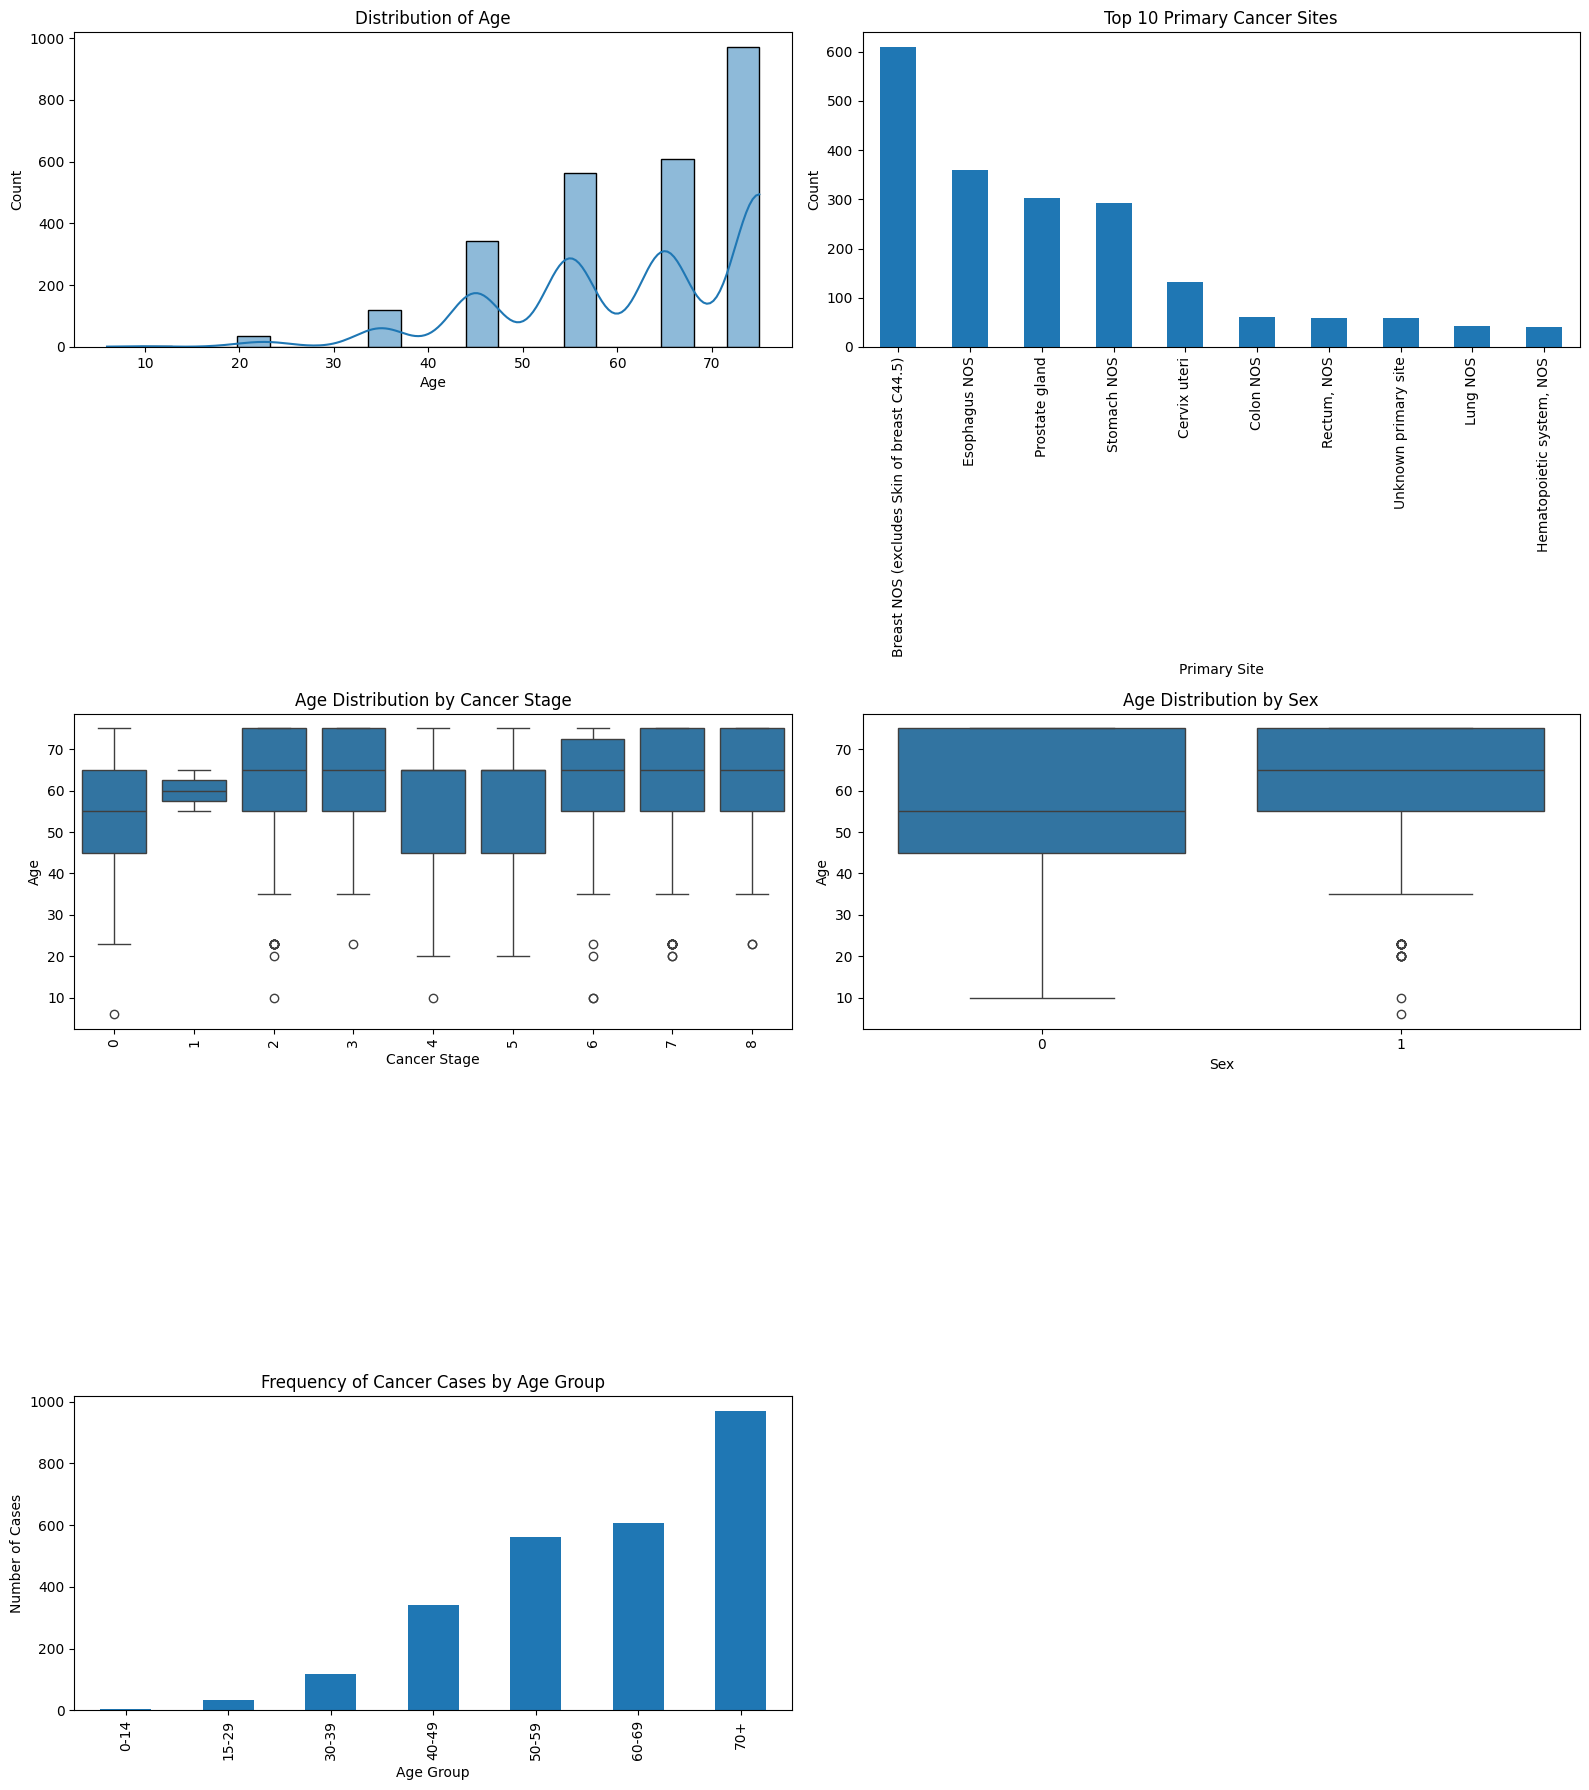

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with subplots (3 rows, 2 columns) for the 6 visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3x2 grid, adjust figsize to fit all plots

# Plot 1: Distribution of Age
sns.histplot(clean_data['Age_Numeric'].dropna(), bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Top 10 Primary Cancer Sites
clean_data['Primary site'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Primary Cancer Sites')
axes[0, 1].set_xlabel('Primary Site')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Correlation between Age and Stage
sns.boxplot(x='Stage', y='Age_Numeric', data=clean_data, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Cancer Stage')
axes[1, 0].set_xlabel('Cancer Stage')
axes[1, 0].set_ylabel('Age')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Age distribution by Sex
sns.boxplot(x='Sex', y='Age_Numeric', data=clean_data, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Sex')
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Age')

# Plot 5: Frequency of cancer by age group
age_groups = pd.cut(clean_data['Age_Numeric'], bins=[0, 14, 29, 39, 49, 59, 69, 100],
                    labels=['0-14', '15-29', '30-39', '40-49', '50-59', '60-69', '70+'])
age_groups.value_counts().sort_index().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Frequency of Cancer Cases by Age Group')
axes[2, 0].set_xlabel('Age Group')
axes[2, 0].set_ylabel('Number of Cases')

# Remove the empty subplot (bottom right)
fig.delaxes(axes[2, 1])

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitl

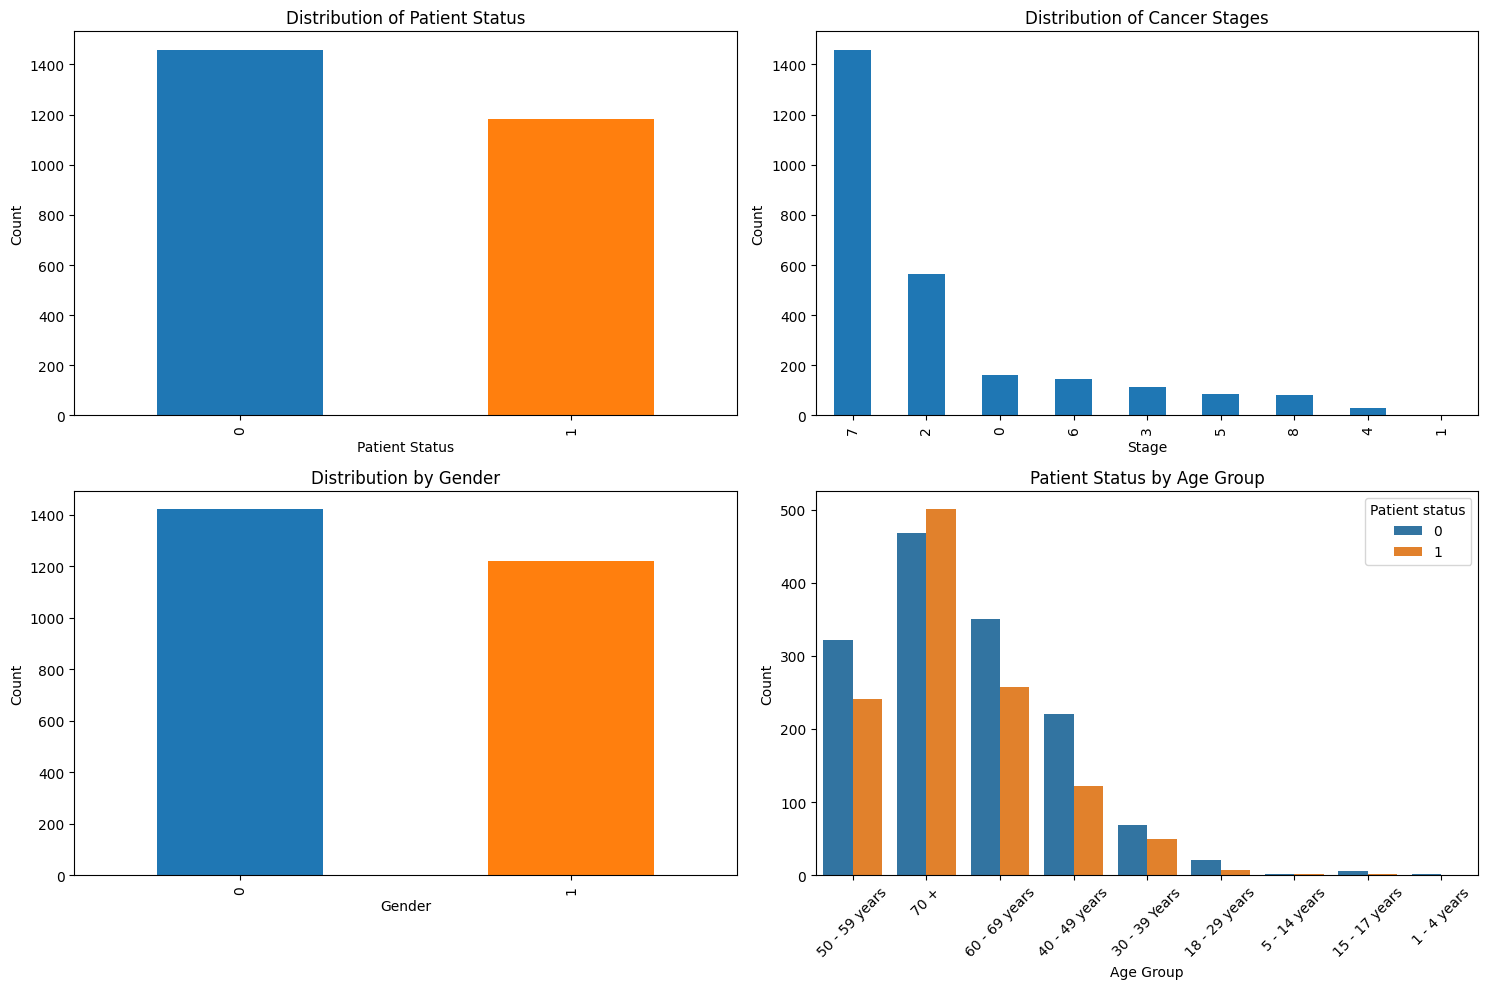

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid, adjust figsize for clarity

# Plot patient status distribution in the first subplot
clean_data['Patient status'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Patient Status')
axes[0, 0].set_xlabel('Patient Status')
axes[0, 0].set_ylabel('Count')

# Plot cancer stage distribution in the second subplot
clean_data['Stage'].value_counts().plot(kind='bar', color='#1f77b4', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Cancer Stages')
axes[0, 1].set_xlabel('Stage')
axes[0, 1].set_ylabel('Count')

# Plot gender distribution in the third subplot
clean_data['Sex'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Plot patient status by age group in the fourth subplot
sns.countplot(data=clean_data, x='Age in Years', hue='Patient status', ax=axes[1, 1])
axes[1, 1].set_title('Patient Status by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Survival Rate Analysis

In [ ]:
# unique_values = {col: df[col].unique() for col in ['Date of data entry', 'Date of reporting']}

# # Print unique values for each column separately
# for column, values in unique_values.items():
#     print(f"Unique values in '{column}':")
#     print(values)
#     print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import pandas as pd

# # Ensure the date columns are in datetime format with dayfirst=True
# clean_data['Date of data entry'] = pd.to_datetime(clean_data['Date of data entry'], dayfirst=True, errors='coerce')
# clean_data['Date of reporting'] = pd.to_datetime(clean_data['Date of reporting'], dayfirst=True, errors='coerce')

# # Optionally drop rows with NaT values
# clean_data = clean_data.dropna(subset=['Date of data entry', 'Date of reporting'])

# # Calculate the absolute difference in days and create a new column 'Duration'
# clean_data['Duration'] = abs((clean_data['Date of reporting'] - clean_data['Date of data entry']).dt.days)

# # Display the first few rows with the relevant columns
# print(clean_data[['Date of data entry', 'Date of reporting', 'Duration']].head(20))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# clean_data.head(19)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Correlation Analysis and Hypothesis Testing



## Chi-Square Test for assosiations between variables

In [ ]:
# Sex and Primary site
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(clean_data['Primary site'], clean_data['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant association between Primary site and Sex.")
else:
    print("No significant association between Primary site and Sex.")


Chi-square Statistic: 1301.8239847038903
P-value: 1.9787576355020245e-194
Significant association between Primary site and Sex.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Histology Type vs. Stage
contingency_table = pd.crosstab(clean_data['Histology Type'], clean_data['Stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant association between Histology Type and Stage.")
else:
    print("No significant association between Histology Type and Stage.")


Chi-square Statistic: 3587.2203882836548
P-value: 2.8286174225629592e-210
Significant association between Histology Type and Stage.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Stage vs. Patient Status
contingency_table = pd.crosstab(clean_data['Stage'], clean_data['Patient status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant association between Stage and Patient Status.")
else:
    print("No significant association between Stage and Patient Status.")


Chi-square Statistic: 648.5703569748732
P-value: 8.382823721642415e-135
Significant association between Stage and Patient Status.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sex vs. Patient Status
contingency_table = pd.crosstab(clean_data['Sex'], clean_data['Patient status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant association between Sex and Patient Status.")
else:
    print("No significant association between Sex and Patient Status.")


Chi-square Statistic: 41.182021148212534
P-value: 1.3869240863742081e-10
Significant association between Sex and Patient Status.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#	Hypothesis Testing:

# Association Rule Mining
## Implemented Apriori and FP-Growth Algorithms

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Assuming your data is in a DataFrame called 'df'

def prepare_data(df):
    # Select relevant columns for association rule mining
    columns_for_analysis = ['Primary site', 'Histology Type', 'Stage', 'Patient status']

    # Create transactions
    transactions = df[columns_for_analysis].values.tolist()

    # Convert transactions to a one-hot encoded DataFrame
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    return df_encoded

def run_apriori(df_encoded, min_support=0.01, min_confidence=0.5, min_lift=1):
    # Generate frequent itemsets using Apriori
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    # Filter rules based on lift
    rules = rules[rules['lift'] >= min_lift]

    return rules

def run_fpgrowth(df_encoded, min_support=0.01, min_confidence=0.5, min_lift=1):
    # Generate frequent itemsets using FP-Growth
    frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    # Filter rules based on lift
    rules = rules[rules['lift'] >= min_lift]

    return rules

def print_top_rules(rules, top_n=10):
    print(f"\nTop {top_n} rules sorted by lift:")
    print(rules.sort_values('lift', ascending=False).head(top_n)[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Prepare the data
df_encoded = prepare_data(df)

# Run Apriori algorithm
apriori_rules = run_apriori(df_encoded, min_support=0.01, min_confidence=0.5, min_lift=1)
print("Apriori Results:")
print_top_rules(apriori_rules)

# Run FP-Growth algorithm
fpgrowth_rules = run_fpgrowth(df_encoded, min_support=0.01, min_confidence=0.5, min_lift=1)
print("\nFP-Growth Results:")
print_top_rules(fpgrowth_rules)

# Compare the results
print("\nComparison of Apriori and FP-Growth:")
print(f"Number of rules generated by Apriori: {len(apriori_rules)}")
print(f"Number of rules generated by FP-Growth: {len(fpgrowth_rules)}")

# Check if the rules are identical
rules_match = apriori_rules.equals(fpgrowth_rules)
print(f"Rules generated by both algorithms are identical: {rules_match}")

if not rules_match:
    print("\nDifferences in rules:")
    apriori_set = set(apriori_rules.index)
    fpgrowth_set = set(fpgrowth_rules.index)
    diff_rules = apriori_set.symmetric_difference(fpgrowth_set)
    print(f"Number of different rules: {len(diff_rules)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apriori Results:

Top 10 rules sorted by lift:
                                           antecedents  \
41                               (Plasma Cell Myeloma)   
42                         (Hematopoietic system, NOS)   
51                   (Adenocarcinoma, Intestinal Type)   
143          (Stage III, Squamous Cell Carcinoma, Nos)   
221           (Infiltrating Duct Carcinoma, Nos, Dead)   
222       (Infiltrating Duct Carcinoma, Nos, Stage Iv)   
220  (Breast NOS (excludes Skin of breast C44.5), D...   
2                    (Adenocarcinoma, Intestinal Type)   
53         (Adenocarcinoma, Intestinal Type, Stage Iv)   
49            (Alive, Adenocarcinoma, Intestinal Type)   

                                           consequents   support  confidence  \
41                         (Hematopoietic system, NOS)  0.012869    0.971429   
42                               (Plasma Cell Myeloma)  0.012869    0.850000   
51                                (Alive, Stomach NOS)  0.011355    0.6000

In [ ]:
clean_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status,Age_Numeric
0,2021-08-06 00:00:00.0,50 - 59 years,0,Breast NOS (excludes Skin of breast C44.5),"Intraductal Carcinoma, Noninfiltrating, Nos",2019-12-11 00:00:00.0,7,1,55
1,2021-08-06 00:00:00.0,50 - 59 years,0,Lymph node NOS,"Malignant Lymphoma, Non-Hodgkin, Nos",2020-02-01 00:00:00.0,7,1,55
2,2021-08-06 00:00:00.0,50 - 59 years,1,Gallbladder,"Carcinoma, Nos",2020-02-20 00:00:00.0,7,1,55
3,2021-08-09 00:00:00.0,70 +,1,Liver,"Hepatocellular Carcinoma, Nos",2020-12-02 00:00:00.0,7,0,75
4,2021-08-09 00:00:00.0,60 - 69 years,0,Stomach NOS,"Adenocarcinoma, Intestinal Type",2021-04-07 00:00:00.0,4,0,65


# Hierachical clustering


In [ ]:
from scipy.cluster.hierarchy import linkage
import pandas as pd

def perform_hierarchical_clustering(clean_data, method='ward'):
    # Select only numerical features for clustering
    numerical_features = clean_data.select_dtypes(include=['number'])

    # Calculate linkage matrix using numerical features
    linkage_matrix = linkage(numerical_features, method=method)
    return linkage_matrix

# Perform hierarchical clustering
linkage_matrix = perform_hierarchical_clustering(clean_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


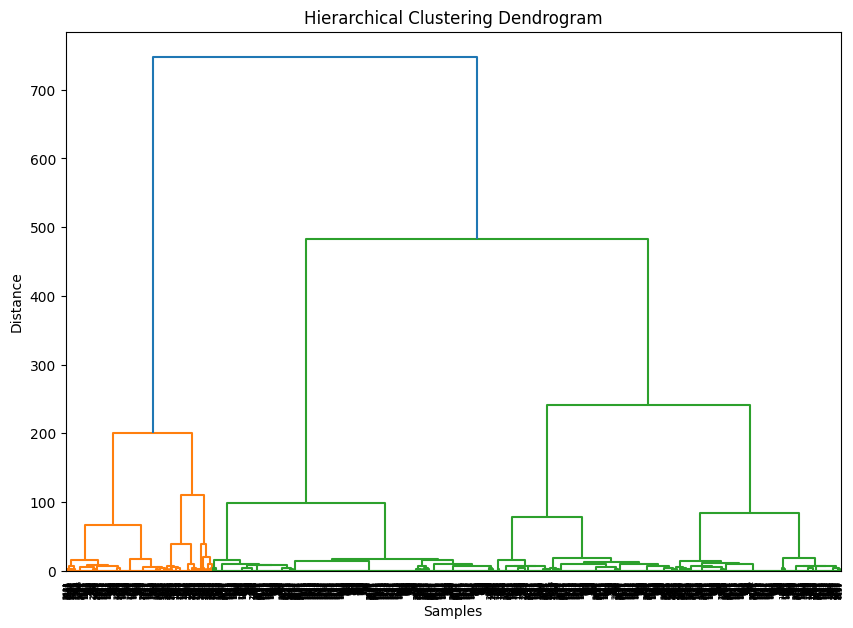

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

plot_dendrogram(linkage_matrix)


# Working with Individual top 10 primary cancer sites cancer

In [ ]:
from scipy.cluster.hierarchy import linkage
import pandas as pd

def perform_hierarchical_clustering(data, primary_site, method='ward'):
    # Filter data for the specific primary site, such as 'BreastNOS'
    # Select all records for 'Breast NOS (excludes Skin of breast C44.5)'
    BreastNOS = clean_data[clean_data['Primary site'] == 'Breast NOS (excludes Skin of breast C44.5)']

    # Display the first few rows of the new DataFrame
    print(BreastNOS.head(10))


    # Select only numerical features for clustering
    numerical_features = BreastNOS.select_dtypes(include=['number'])

    # Calculate linkage matrix using numerical features
    linkage_matrix = linkage(numerical_features, method=method)
    return linkage_matrix
    # Perform hierarchical clustering
    linkage_matrix = perform_hierarchical_clustering(clean_data, 'BreastNOS')
    return linkage_matrix




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


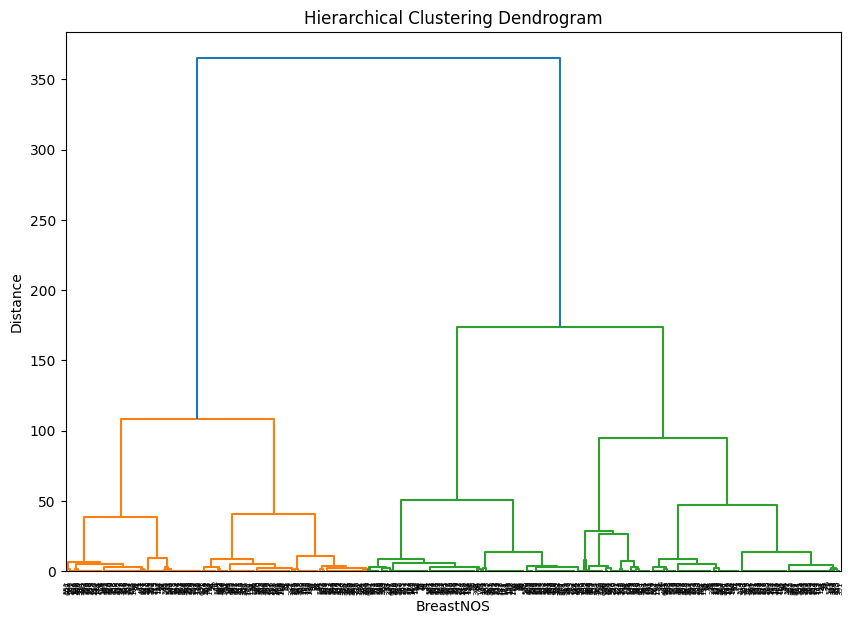

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Filter data for 'BreastNOS' primary site
BreastNOS = clean_data[clean_data['Primary site'] == 'Breast NOS (excludes Skin of breast C44.5)']

numerical_features = BreastNOS.select_dtypes(include=['number'])

# Perform hierarchical clustering on the filtered data
linkage_matrix = linkage(numerical_features, method='ward')

# Generate labels for the dendrogram based on the index of numerical_features
# Assuming 'breastnos_labels' is intended to represent the samples being clustered
breastnos_labels = np.arange(numerical_features.shape[0])

# Define the dendrogram plotting function
def plot_dendrogram(linkage_matrix, labels=None):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=labels) # Use the generated labels
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("BreastNOS")
    plt.ylabel("Distance")
    plt.xticks(rotation=90)
    plt.show()

# Plot the dendrogram
plot_dendrogram(linkage_matrix, labels=breastnos_labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


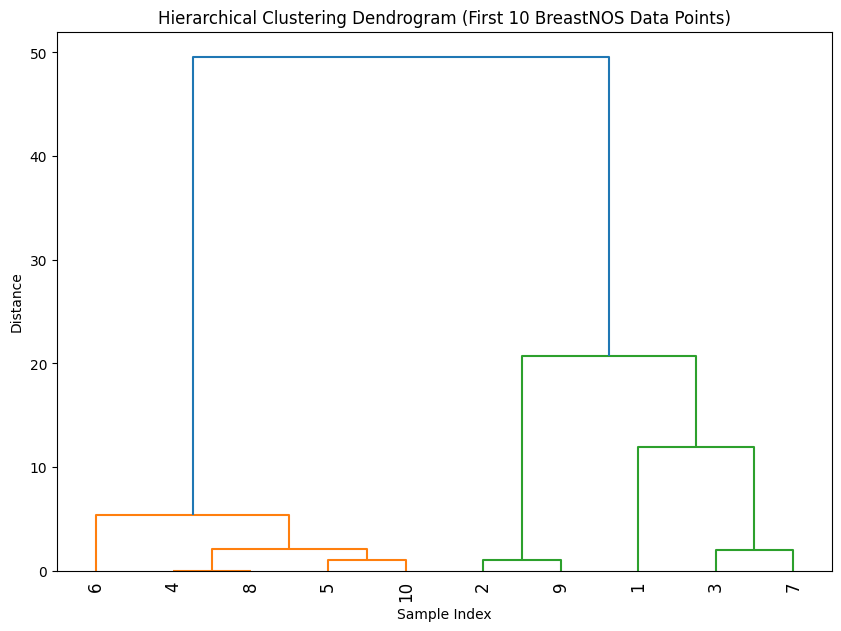

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Filter data for 'Breast NOS (excludes Skin of breast C44.5)' primary site
BreastNOS = clean_data[clean_data['Primary site'] == 'Breast NOS (excludes Skin of breast C44.5)']

# Select the first 10 rows and their numerical features only
numerical_features = BreastNOS.select_dtypes(include=['number']).iloc[:10]

# Perform hierarchical clustering on the filtered data
linkage_matrix = linkage(numerical_features, method='ward')

# Generate labels for the dendrogram for the first 10 samples
breastnos_labels = np.arange(1, 11)  # Labels from 1 to 10 for clarity

# Define the dendrogram plotting function
def plot_dendrogram(linkage_matrix, labels=None):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=labels)
    plt.title("Hierarchical Clustering Dendrogram (First 10 BreastNOS Data Points)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.xticks(rotation=90)
    plt.show()

# Plot the dendrogram with only the first 10 data points
plot_dendrogram(linkage_matrix, labels=breastnos_labels)


#  Distance Metric

In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder

def compute_distance_matrix(df, metric='euclidean'):
    # Encoding categorical columns
    df_encoded = df.copy()
    label_encoders = {}

    # Loop through each column and apply label encoding if it's categorical
    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object':  # Categorical columns
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
            label_encoders[column] = le

    # Selecting numeric columns only
    df_numeric = df_encoded.select_dtypes(include=[int, float])

    # Check if we have numeric columns before calculating distance matrix
    if df_numeric.empty:
        print("No numeric columns available for computing distance matrix.")
        return None

    # Compute the pairwise distance matrix
    distance_matrix = pdist(df_numeric, metric=metric)

    # Convert the distance matrix to square form for easy viewing
    return squareform(distance_matrix)

# Apply the function to your dataset
distance_matrix = compute_distance_matrix(clean_data)

# To see the result
if distance_matrix is not None:
    print(distance_matrix)



[[0.00000000e+00 5.36656315e+01 6.27216071e+01 ... 8.46105785e+02
  9.37522266e+02 9.36593295e+02]
 [5.36656315e+01 0.00000000e+00 5.98498120e+01 ... 8.77044469e+02
  9.02469944e+02 9.01540349e+02]
 [6.27216071e+01 5.98498120e+01 0.00000000e+00 ... 8.87050731e+02
  8.99984444e+02 8.99064514e+02]
 ...
 [8.46105785e+02 8.77044469e+02 8.87050731e+02 ... 0.00000000e+00
  1.66229690e+03 1.66130070e+03]
 [9.37522266e+02 9.02469944e+02 8.99984444e+02 ... 1.66229690e+03
  0.00000000e+00 1.00000000e+00]
 [9.36593295e+02 9.01540349e+02 8.99064514e+02 ... 1.66130070e+03
  1.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# visualising the distance matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


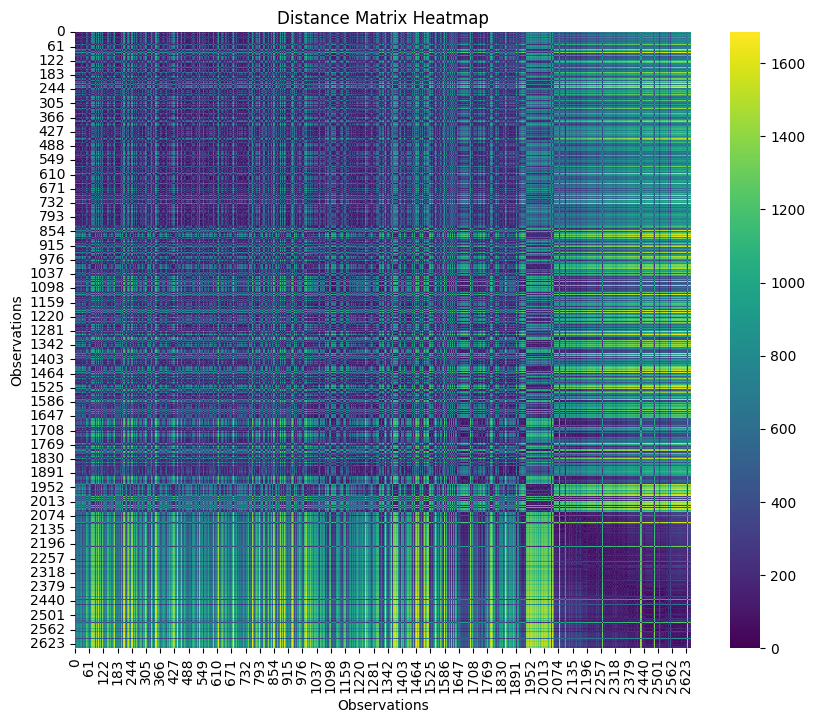

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_distance_matrix(distance_matrix):
    # Ensure distance_matrix is a NumPy array
    distance_matrix = np.asarray(distance_matrix)

    # Reshape to square if it's 1D
    n = int(np.sqrt(distance_matrix.shape[0]))  # Calculate size for reshaping
    if distance_matrix.ndim == 1:  # Check if it's 1D
        distance_matrix = distance_matrix.reshape((n, n))  # Reshape to square

    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_matrix, cmap='viridis', square=True, annot=False)
    plt.title('Distance Matrix Heatmap')
    plt.xlabel('Observations')
    plt.ylabel('Observations')
    plt.show()

# Call the plotting function
plot_distance_matrix(distance_matrix)

#  Optimal Cluster ,e


In [ ]:
# Clustering function
from sklearn.cluster import KMeans # Importing the KMeans class

def perform_clustering(clean_data, n_clusters=5):
    """
    Perform KMeans clustering on the preprocessed data using Age, Sex, and Stage.
    """
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clean_data['Cluster'] = kmeans.fit_predict(clean_data[['Age_Numeric', 'Sex', 'Stage']])  # Adjust features as needed
    return clean_data
perform_clustering(clean_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date of data entry,Age in Years,Sex,Primary site,Histology Type,Date of reporting,Stage,Patient status,Age_Numeric,Cluster
0,2021-08-06 00:00:00.0,50 - 59 years,0,Breast NOS (excludes Skin of breast C44.5),"Intraductal Carcinoma, Noninfiltrating, Nos",2019-12-11 00:00:00.0,7,1,55,3
1,2021-08-06 00:00:00.0,50 - 59 years,0,Lymph node NOS,"Malignant Lymphoma, Non-Hodgkin, Nos",2020-02-01 00:00:00.0,7,1,55,3
2,2021-08-06 00:00:00.0,50 - 59 years,1,Gallbladder,"Carcinoma, Nos",2020-02-20 00:00:00.0,7,1,55,3
3,2021-08-09 00:00:00.0,70 +,1,Liver,"Hepatocellular Carcinoma, Nos",2020-12-02 00:00:00.0,7,0,75,2
4,2021-08-09 00:00:00.0,60 - 69 years,0,Stomach NOS,"Adenocarcinoma, Intestinal Type",2021-04-07 00:00:00.0,4,0,65,1
...,...,...,...,...,...,...,...,...,...,...
2637,2024-03-25 00:00:00.0,70 +,1,Lung NOS,"Adenocarcinoma, Nos",2023-11-07 00:00:00.0,7,1,75,2
2638,2024-03-25 00:00:00,60 - 69 years,1,esophagus,Squamous Cell Carcinoma,2023-06-11 00:00:00,7,1,65,1
2639,2024-03-25 00:00:00,70 +,0,Breast NOS (excludes Skin of breast C44.5),"Infiltrating Duct Carcinoma, Nos",18-03-2024,5,0,75,2
2640,25-03-2024,60 - 69 years,0,esophagus,Squamous Cell Carcinoma,24-03-2024,7,1,65,1


In [ ]:
def analyze_clusters(clean_data):
    # Handle missing values if necessary (optional)
    clean_data = clean_data.fillna('Unknown')

    # Group by the Cluster column and compute summary statistics
    cluster_summary = clean_data.groupby('Cluster').agg({
        'Age in Years': lambda x: x.value_counts().index[0] if not x.isna().all() else 'Unknown',  # Most common age range
        'Primary site': lambda x: x.value_counts().index[0] if not x.isna().all() else 'Unknown',  # Most common cancer type
        # Add other relevant columns if needed, e.g., mean or median
    }).reset_index()

    return cluster_summary

# Call the analyze_clusters function to get cluster characteristics
cluster_analysis = analyze_clusters(clean_data)
print(cluster_analysis)


   Cluster   Age in Years                                Primary site
0        0  30 - 39 Years  Breast NOS (excludes Skin of breast C44.5)
1        1  60 - 69 years  Breast NOS (excludes Skin of breast C44.5)
2        2           70 +                              Prostate gland
3        3  50 - 59 years  Breast NOS (excludes Skin of breast C44.5)
4        4  40 - 49 years  Breast NOS (excludes Skin of breast C44.5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Analysis of the cluster
Insights from Cluster Analysis:

Age Group Distribution:

Cluster 0: Majority of patients are aged between 30 - 39 years.

Cluster 1: Majority of patients are aged between 60 - 69 years.

Cluster 2: Patients in this cluster are 70+ years.

Cluster 3: Patients are aged between 50 - 59 years.

Cluster 4: Patients are aged between 40 - 49 years.

This shows that each cluster primarily groups patients by their age bracket, indicating a significant factor in how clusters are formed.

Primary Site Distribution:

Breast NOS is the most common primary site across Clusters 0, 1, 3, and 4, which suggests that breast cancer dominates among younger and middle-aged clusters (30–69 years).

Prostate gland cancer is dominant in Cluster 2, representing patients aged 70+ years. This aligns with the fact that prostate cancer typically affects older men.

Summary of Findings:
Breast cancer appears to be the prevalent cancer type among patients aged between 30 and 69 years, spread across four clusters.

Prostate cancer is more common in the elderly group (Cluster 2, aged 70+), which is consistent with known patterns in cancer epidemiology.


In [ ]:
# Function to summarize clusters
def summarize_clusters(clean_data):
    """
    Summarize the characteristics of each cluster in terms of Age, Primary Site, Stage, and Patient Status.
    """
    cluster_summary = clean_data.groupby('Cluster').agg({
        'Age in Years': 'first',
        'Primary site': 'first',
        'Stage': 'mean',            # Mean value for stage (0=Early, 1=Late)
        'Patient status': 'first',  # First entry of patient status in each cluster
        'Sex': 'first',
    }).reset_index()

    print("\nCluster Summary:")
    print(cluster_summary)

# Call the function to summarize clusters
summarize_clusters(clean_data)


Cluster Summary:
   Cluster   Age in Years                                Primary site  \
0        0  30 - 39 Years                            Skin limb, lower   
1        1  60 - 69 years                                 Stomach NOS   
2        2           70 +                                       Liver   
3        3  50 - 59 years  Breast NOS (excludes Skin of breast C44.5)   
4        4  40 - 49 years                                Cervix uteri   

      Stage  Patient status  Sex  
0  4.855346               0    1  
1  5.294408               0    0  
2  5.482474               0    1  
3  5.012433               1    0  
4  4.751462               0    0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Cluster Analysis of Cancer Patients by Age, Primary Site, Stage, Patient Status, and Sex:


Cluster 0:

Age Group: 30 - 39 years

Primary Site: Skin limb, lower
This suggests that patients in this cluster tend to have cancers affecting the skin of the lower limbs.


Stage: 4.86
The mean stage indicates patients are likely in advanced stages of cancer (since 0 = early, 1 = late, a value above 4 suggests even more advanced stages).


Patient Status: 0

The status is likely indicating that the majority of patients in this cluster are still alive (assuming 0 = alive, 1 = deceased).


Sex: 1
Predominantly male patients in this cluster.


Cluster 1:

Age Group: 60 - 69 years

Primary Site: Stomach NOS

Stomach cancer is the most common in this cluster.

Stage: 5.29

Like Cluster 0, this cluster has advanced-stage cancer, even slightly higher, indicating more severe cases.

Patient Status: 0
Most patients are alive.

Sex: 0
Predominantly female patients in this cluster.


Cluster 2:

Age Group: 70+ years

Primary Site: Liver

Liver cancer is prevalent among patients aged 70+.

Stage: 5.48

This indicates very late-stage liver cancer among elderly patients.

Patient Status: 0
Majority of patients are still alive.

Sex: 1
Predominantly male patients.


Cluster 3:

Age Group: 50 - 59 years

Primary Site: Breast NOS (excluding Skin of the breast)

Breast cancer is the dominant cancer type among patients aged 50-59 years.

Stage: 5.01

This is also a late stage of cancer.

Patient Status: 1
A significant proportion of patients in this cluster are deceased (assuming 1 = deceased).

Sex: 0
Predominantly female patients.

Cluster 4:

Age Group: 40 - 49 years

Primary Site: Cervix uteri

Cervical cancer is common among patients aged 40-49 years.

Stage: 4.75

This is another advanced-stage cancer cluster.

Patient Status: 0

Most patients in this cluster are alive.
Sex: 0
Predominantly female patients.





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)



Stage Comparison Across Clusters:
Stage     0  1    2   3   4   5   6    7   8
Cluster                                     
0        15  0   35   9   3   6  10   75   6
1        29  1  125  23  11  27  40  336  16
2        29  0  207  43   5  19  37  602  28
3        45  1  128  26   2  15  36  292  18
4        44  0   69  12   7  19  23  154  14


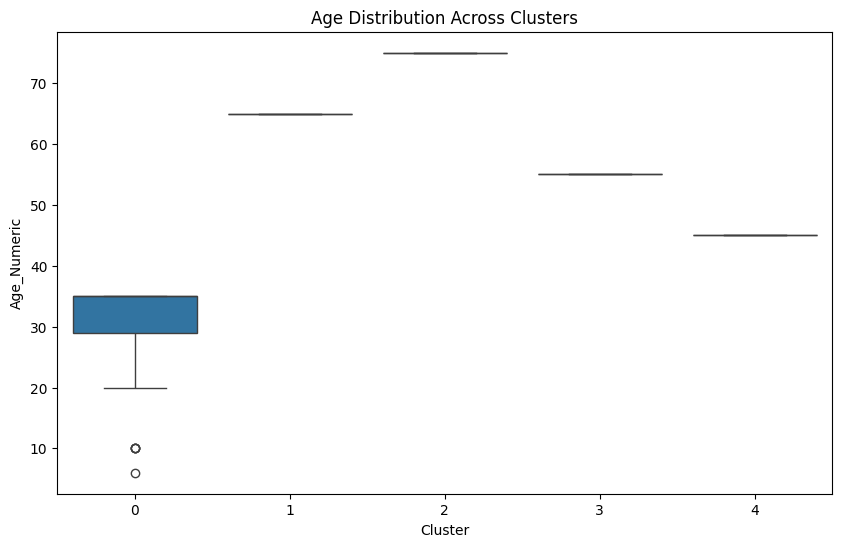


Patient Status Comparison Across Clusters:
Patient status    0    1
Cluster                 
0                98   61
1               350  258
2               469  501
3               322  241
4               220  122


In [ ]:
# Cluster comparison function
def compare_clusters(clean_data):
    """
    Compare clusters in terms of stage and patient status using cross-tabulation and visualizations.
    """
    # Compare 'Stage' across clusters
    stage_comparison = pd.crosstab(clean_data['Cluster'], clean_data['Stage'])
    print("\nStage Comparison Across Clusters:")
    print(stage_comparison)

    # Visualize cluster comparison for age distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='Age_Numeric', data=clean_data)
    plt.title('Age Distribution Across Clusters')
    plt.show()

    # Compare 'Patient status' across clusters
    patient_status_comparison = pd.crosstab(clean_data['Cluster'], clean_data['Patient status'])
    print("\nPatient Status Comparison Across Clusters:")
    print(patient_status_comparison)

compare_clusters(clean_data)

# Distribution of Cancer Comparison Across Patient Clusters




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


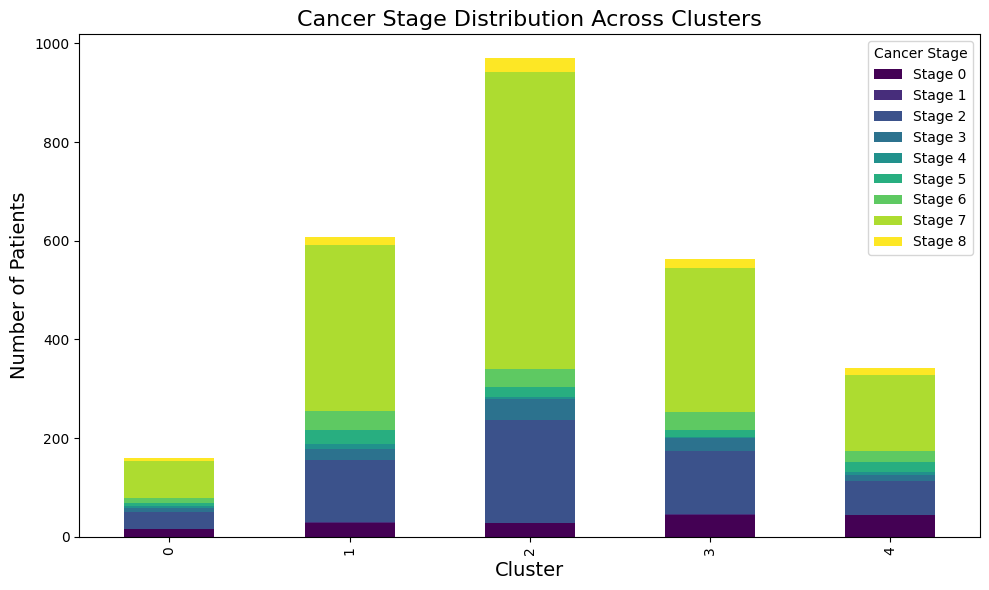

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stage_distribution():
    """
    Function to create a stacked bar plot showing the distribution of cancer stages across clusters.
    """
    # Data for stage comparison across clusters
    data = {
        'Cluster': [0, 1, 2, 3, 4],
        'Stage 0': [15, 29, 29, 45, 44],
        'Stage 1': [0, 1, 0, 1, 0],
        'Stage 2': [35, 125, 207, 128, 69],
        'Stage 3': [9, 23, 43, 26, 12],
        'Stage 4': [3, 11, 5, 2, 7],
        'Stage 5': [6, 27, 19, 15, 19],
        'Stage 6': [10, 40, 37, 36, 23],
        'Stage 7': [75, 336, 602, 292, 154],
        'Stage 8': [6, 16, 28, 18, 14]
    }

    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Set 'Cluster' as index
    df.set_index('Cluster', inplace=True)

    # Plot stacked bar plot
    df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

    # Adding labels and title
    plt.title('Cancer Stage Distribution Across Clusters', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel('Number of Patients', fontsize=14)
    plt.legend(title='Cancer Stage')
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function to plot
plot_stage_distribution()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitl

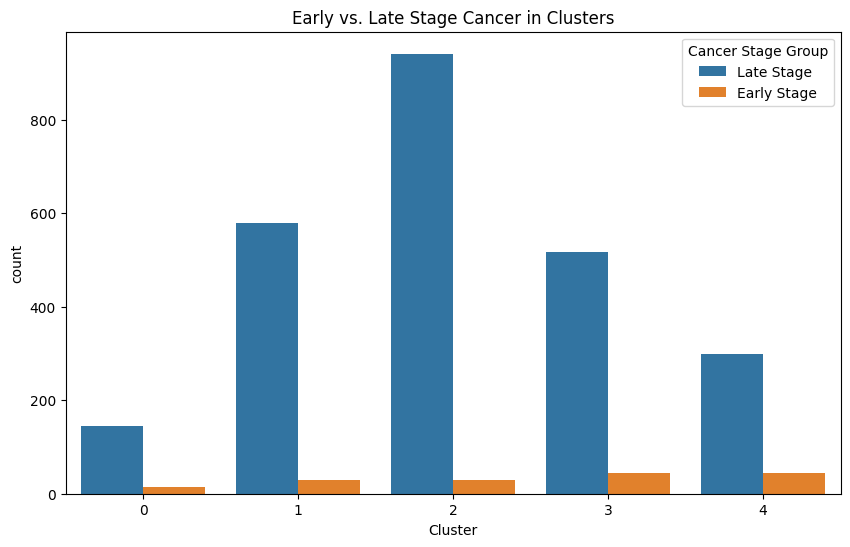

In [ ]:
# Function for segmentation and grouping by cancer stage
def segment_by_stage(clean_data):
    """
    Segment the data by early-stage and late-stage cancer within each cluster.
    """
    clean_data['Cancer Stage Group'] = clean_data['Stage'].apply(lambda x: 'Early Stage' if x == 0 else 'Late Stage')

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue='Cancer Stage Group', data=clean_data)
    plt.title('Early vs. Late Stage Cancer in Clusters')
    plt.show()

segment_by_stage(clean_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitl

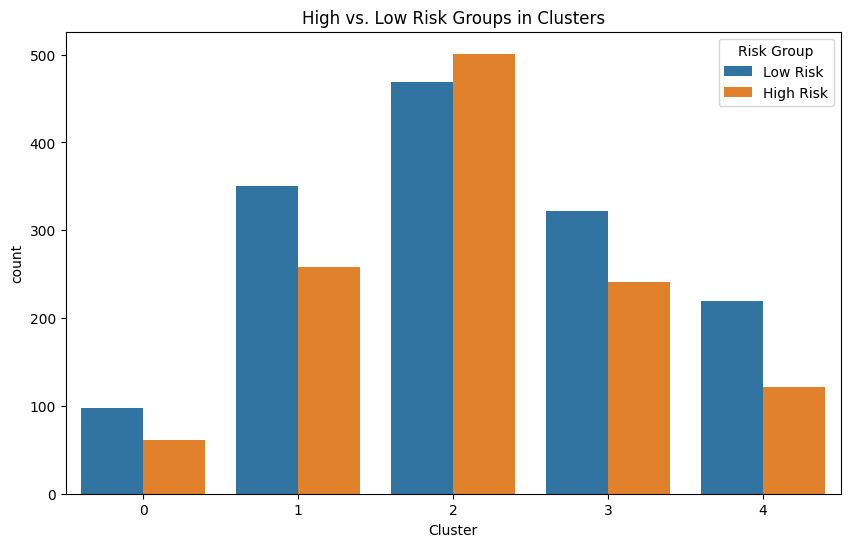

In [ ]:

# Function for identifying high-risk groups
def identify_high_risk(clean_data):
    """
    Identify high-risk vs. low-risk groups within clusters based on patient status.
    """
    clean_data['Risk Group'] = clean_data['Patient status'].apply(lambda x: 'High Risk' if x == 1 else 'Low Risk')

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue='Risk Group', data=clean_data)
    plt.title('High vs. Low Risk Groups in Clusters')
    plt.show()

identify_high_risk(clean_data)

In [ ]:
# Histology comparison function
def compare_histology(clean_data):
    """
    Compare histology types across clusters.
    """
    histology_comparison = pd.crosstab(clean_data['Cluster'], clean_data['Histology Type'])
    print("\nHistology Comparison Across Clusters:")
    print(histology_comparison)

    '''plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue='Histology Type', data=clean_data)
    plt.title('Histology Types in Clusters')
    plt.show()'''

compare_histology(clean_data)


Histology Comparison Across Clusters:
Histology Type  Acinar Cell Adenoma  Acinar Cell Carcinoma  \
Cluster                                                      
0                                 0                      0   
1                                 0                      1   
2                                 3                      1   
3                                 0                      1   
4                                 0                      0   

Histology Type  Acinar Cell Cystadenocarcinoma  Acral Melanoma  \
Cluster                                                          
0                                            0               0   
1                                            0               0   
2                                            1               2   
3                                            0               0   
4                                            0               0   

Histology Type  Acute Myeloid Leukemia, Nos  Adenocarcinoma In 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
